# Seatle Airbnb House Price Analysis

This project focuses on the house price of Airbnb in Seatle. I downloaded the data from Kaggle(https://www.kaggle.com/airbnb/seattle). The airbnb also provides their data to the public including many cities(http://insideairbnb.com/get-the-data.html). The questions I try to answer here are 
* Where are best locations to invest an airbnb house in Seattle?
* How important is the review? Should the host put more effort improving the review?
* Does the preperty types affect on the listing price?
* How to predict the listing price based on machine learning model?

First, let's read in the data and necessary library.

In [180]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython import display
%matplotlib inline

#import the folium package
import folium
from folium import plugins

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Load the Data

In this project, I focus on the listing price of the Airbnb house.

In [75]:
df_listing = pd.read_csv(r"C:\Users\YiChen\Downloads\new study\udacity\blog post and github\seattle\listings.csv")
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [76]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [77]:
df_listing.shape

(3818, 92)

In [78]:
df_listing['neighbourhood'].value_counts()

Capitol Hill                 351
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Atlantic                      50
North Admiral                 48
Mount Baker                   46
Leschi                        44
Maple Leaf                    41
Eastlake                      41
Madrona                       40
Pike Place Market             39
The Junction                  36
Bryant                        32
Seward Park                   32
          

# Preprocessing

## Access Missing Data

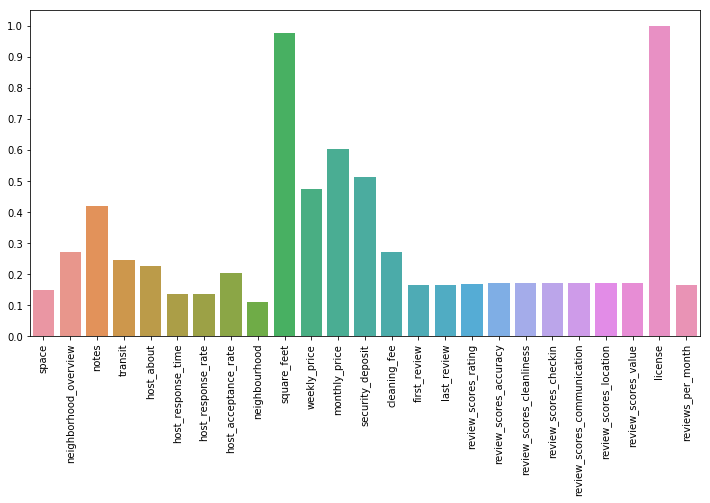

In [79]:
#draw the missing value counts(by mean)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,1.2,0.1))
sns.barplot(x = df_listing.isnull().mean()[df_listing.isnull().mean() >= 0.1 ].index, y = df_listing.isnull().mean()[df_listing.isnull().mean() >= 0.1 ].values)
plt.show()

In [80]:
# Remove the outlier columns from the dataset.
percent_missing_per_column =(df_listing.isnull().mean())*100
percent_missing_per_column_20 = percent_missing_per_column[percent_missing_per_column>20]
drop_columns = percent_missing_per_column_20.index.tolist()
df_listing = df_listing.drop(drop_columns, axis=1)
print('These columns have more than 20 percent missing data, and will be dropped:{}'.format(drop_columns))

These columns have more than 20 percent missing data, and will be dropped:['neighborhood_overview', 'notes', 'transit', 'host_about', 'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'license']


## Price Map

There are three kinds of price, daily price, weekly price and monthly price. But the weekly price and monthly price are dropped before.

In [83]:
df_listing['price'].isnull().mean()

0.0

In [84]:
df_listing['price'] = pd.to_numeric(df_listing['price'].apply(lambda x: str(x).replace('$','').replace(',','')),errors = 'coerce')

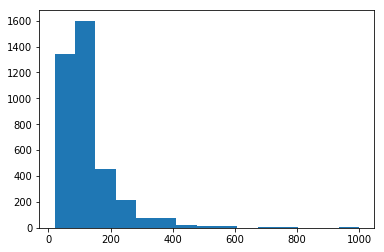

In [85]:
plt.hist(df_listing['price'],bins = 15)
plt.show()

We noticed that the price is mainly in the range \\$0 - $400.

In [86]:
# let's begin to draw the price map on google map.
#get latitude and longitude minimum. 

lat_min = df_listing['latitude'].min()
lon_min = df_listing['longitude'].min()
 
 

In [87]:
df_listing['color']=df_listing['price'].apply(lambda price:"Black" if price>=600 else
                                         "darkblue" if price>=400 and price<600 else
                                         "red" if price>=200 and price<400 else
                                         "green" if price>=150 and price<200 else
                                         "Orange" if price>=100 and price<150 else
                                         "lightblue" if price>=75 and price<100 else
                                         "brown" if price>=50 and price<75 else
                                         "grey")
df_listing['size']=df_listing['price'].apply(lambda price:12 if price>=600 else
                                        10 if price>=400 and price<600 else
                                         8 if price>=200 and price<400 else
                                         6 if price>=150 and price<200 else
                                        4 if price>=100 and price<150 else
                                         2 if price>=75 and price<100 else
                                        1 if price>=50 and price<75 else
                                         0.5)
                                              

In [88]:
 
m=folium.Map([lon_min,lat_min],zoom_start=5)
#location=location[0:2000]
for lat,lon,price,color,size in zip(df_listing['latitude'],df_listing['longitude'],df_listing['price'],df_listing['color'],df_listing['size']):
     folium.CircleMarker([lat, lon], 
                         radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)
m

The map plotting shows most of the airbnb house is in the central area. And the house in the central area is more expensive

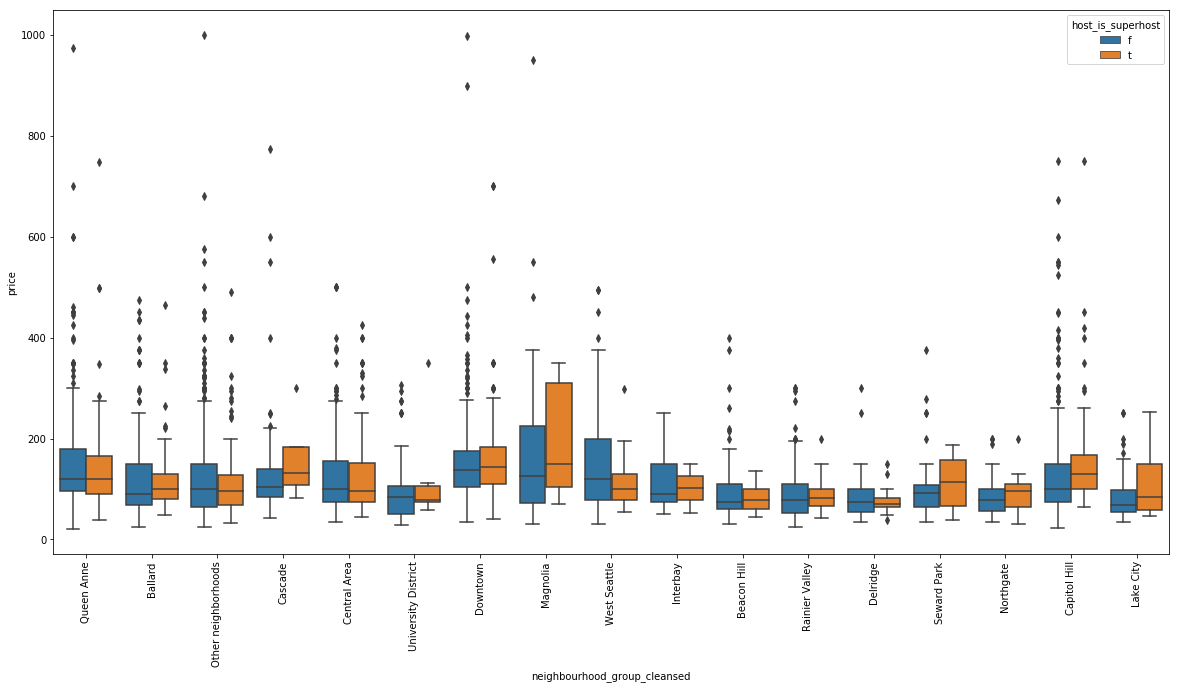

In [90]:

#The boxplot of the price grouped by the neighbourhood.
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.boxplot(x = 'neighbourhood_group_cleansed',y = 'price' , hue ='host_is_superhost',data = df_listing)

From the above graph, we can found the most expensive neighbourhood as followed: Queen Anne, Downtown, Magnolia,Central area, and Capitol Hill. 

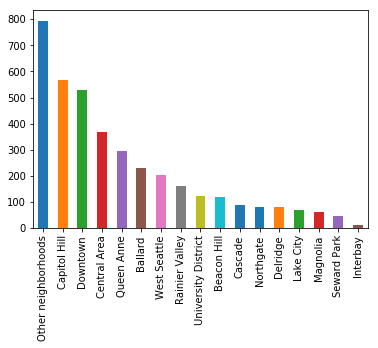

In [91]:
df_listing.neighbourhood_group_cleansed.value_counts().plot.bar()

The house listing also is counted based on the "neighbourhood_group_cleansed". Most of the listing house come from Capital Hill, Downtown, Central Area, Queen Anne. These four districts also are the most expensive districts based on the listing price.

## Whether the review matters?

In [93]:
#define the new dataset only contain the price and review
df_review = df_listing[[ 'price', 'host_is_superhost','number_of_reviews',
      'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value' ]]

In [95]:
df_review.corr()

,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
price,1.000000,-0.124695,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776
number_of_reviews,-0.124695,1.000000,0.036242,0.066618,0.055609,0.089449,0.072957,-0.009188,0.044110
review_scores_rating,0.055551,0.036242,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534
review_scores_accuracy,0.019026,0.066618,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878
review_scores_cleanliness,0.054357,0.055609,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354
review_scores_checkin,0.007877,0.089449,0.521813,0.407238,0.398696,1.000000,0.696345,0.240903,0.403263
review_scores_communication,0.012990,0.072957,0.540620,0.423189,0.388146,0.696345,1.000000,0.284635,0.463772
review_scores_location,0.075069,-0.009188,0.368423,0.267605,0.277834,0.240903,0.284635,1.000000,0.368252
review_scores_value,-0.041776,0.044110,0.696534,0.562878,0.524354,0.403263,0.463772,0.368252,1.000000


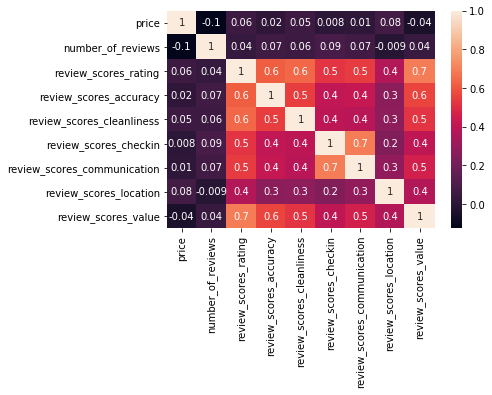

In [189]:
sns.heatmap(df_review.corr(), annot = True, fmt='.1g')

We oberve a negative corrlation between the price and number of reviews.

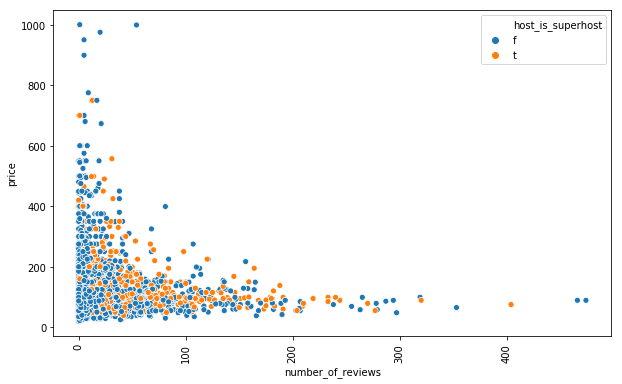

In [100]:
#Scatter plot of the price and the number of review.
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.scatterplot(x ='number_of_reviews', hue = 'host_is_superhost',y = 'price',data = df_review)


In [103]:
#Since the price above 400 does not get lots of review, I will limit the price under 400.
df_review[df_review['price']<400].corr()

,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
price,1.000000,-0.125924,0.051144,0.011705,0.047694,-0.014870,-0.000420,0.093958,-0.058114
number_of_reviews,-0.125924,1.000000,0.038154,0.068529,0.057443,0.090803,0.074252,-0.008904,0.044891
review_scores_rating,0.051144,0.038154,1.000000,0.622565,0.644907,0.524977,0.539039,0.363621,0.695361
review_scores_accuracy,0.011705,0.068529,0.622565,1.000000,0.541265,0.408883,0.425458,0.267355,0.565959
review_scores_cleanliness,0.047694,0.057443,0.644907,0.541265,1.000000,0.397208,0.388190,0.276955,0.527996
review_scores_checkin,-0.014870,0.090803,0.524977,0.408883,0.397208,1.000000,0.698234,0.239326,0.406037
review_scores_communication,-0.000420,0.074252,0.539039,0.425458,0.388190,0.698234,1.000000,0.281226,0.462252
review_scores_location,0.093958,-0.008904,0.363621,0.267355,0.276955,0.239326,0.281226,1.000000,0.364943
review_scores_value,-0.058114,0.044891,0.695361,0.565959,0.527996,0.406037,0.462252,0.364943,1.000000


The limitation of the price does not change the correlation matrix lot. 

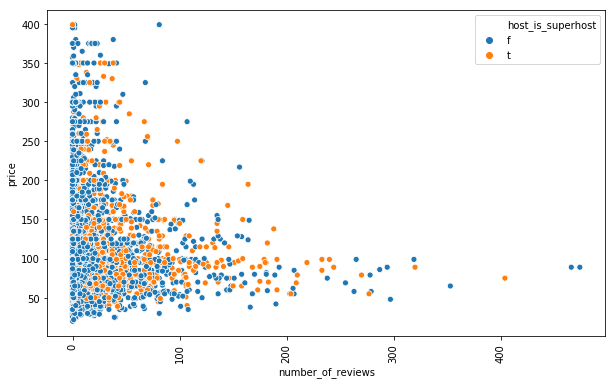

In [106]:
# Scatter plot of the price and the number of review.
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.scatterplot(x ='number_of_reviews', hue = 'host_is_superhost',y = 'price',data = df_review[df_review['price']<400])

Clearly, the host has no incentive to increase the number of review based on the negative relationship.And the tenant like to make a reivew for the house with lower price.However, I also observe that superhost used to have more review than non-superhost in general. 

Let's see the scatter plot between the price and the review score. From the correlation matrix, I found that the review of location has the highest correlation with price compared with other score, and correlation between them is increasing when the price is limited under $400

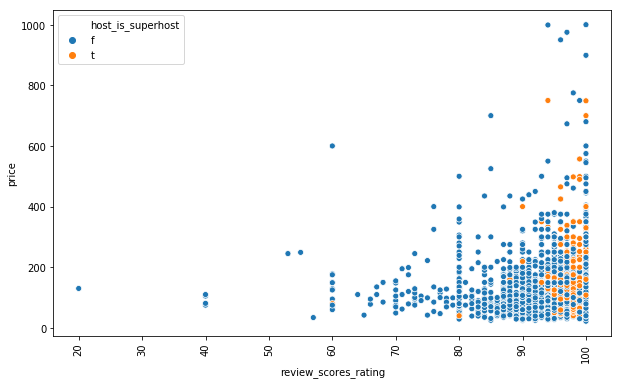

In [142]:
#Let's see the box plot between the price and the review score. 
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.scatterplot(x ='review_scores_rating', hue = 'host_is_superhost',y = 'price',data = df_review)

The scatter plot of price and review scores shows that the positive correlation between the price and review score, and the superhosts are having higher review score than the non-superhost. 

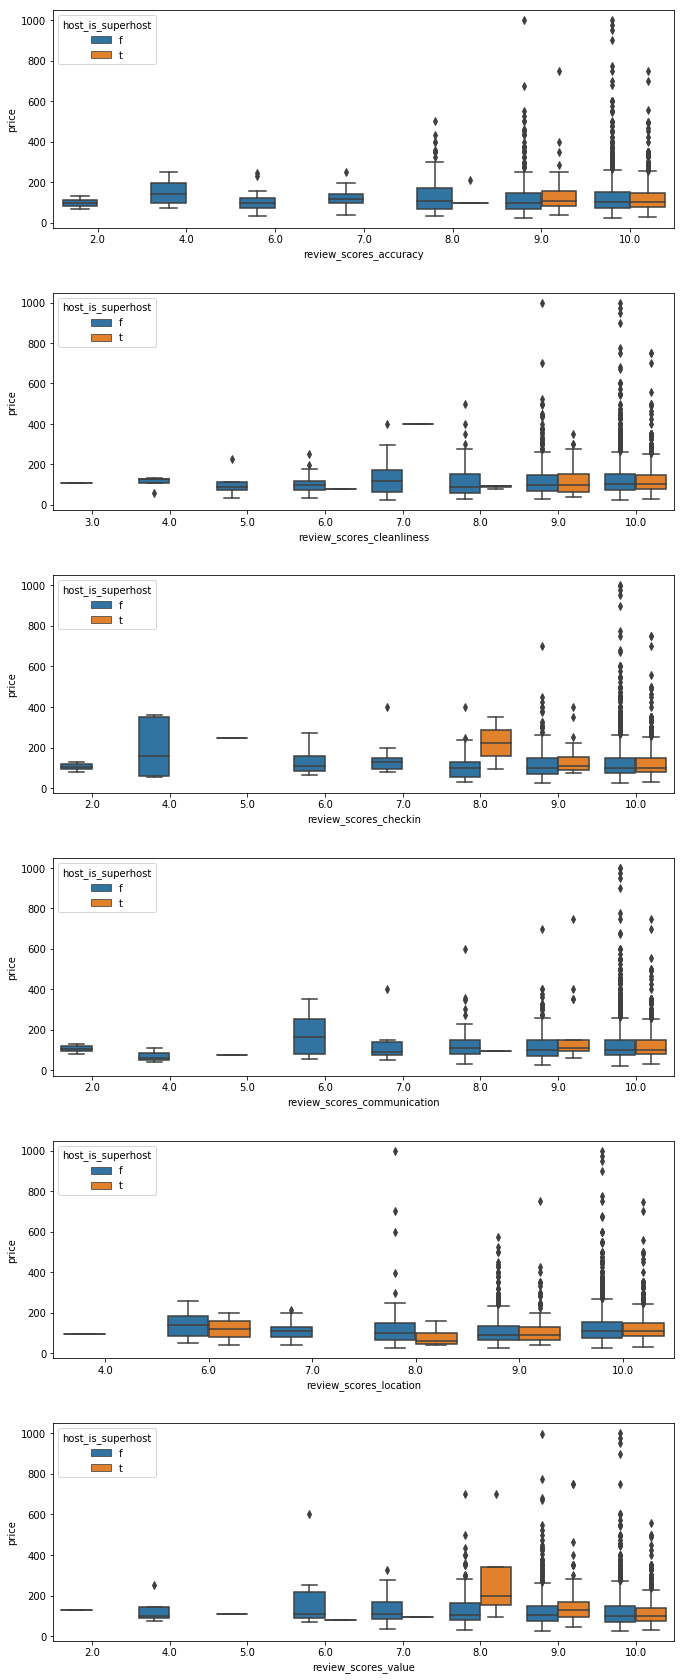

In [143]:
'''boxplot for the ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value' ]and the price.'''
review_columns = ['review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value' ]
fig, axs = plt.subplots(nrows=len(review_columns),ncols=1,figsize = (15,30))
fig.subplots_adjust(left = 0.125, right = 0.7, hspace = 0.3, wspace=1)
for i in range(len(review_columns)):
    sns.boxplot(x =review_columns[i], hue = 'host_is_superhost',y = 'price',data = df_listing,ax = axs[i])

The boxplots of the different types of review scores and the price does not show a very obvious correlation between them, just as the correlation matrix shows. 

## Does the size and type of the house matter?

Let's consider the features that represent the size of the house, they are 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type'(the "accommodates", which means how many people can live in the property)

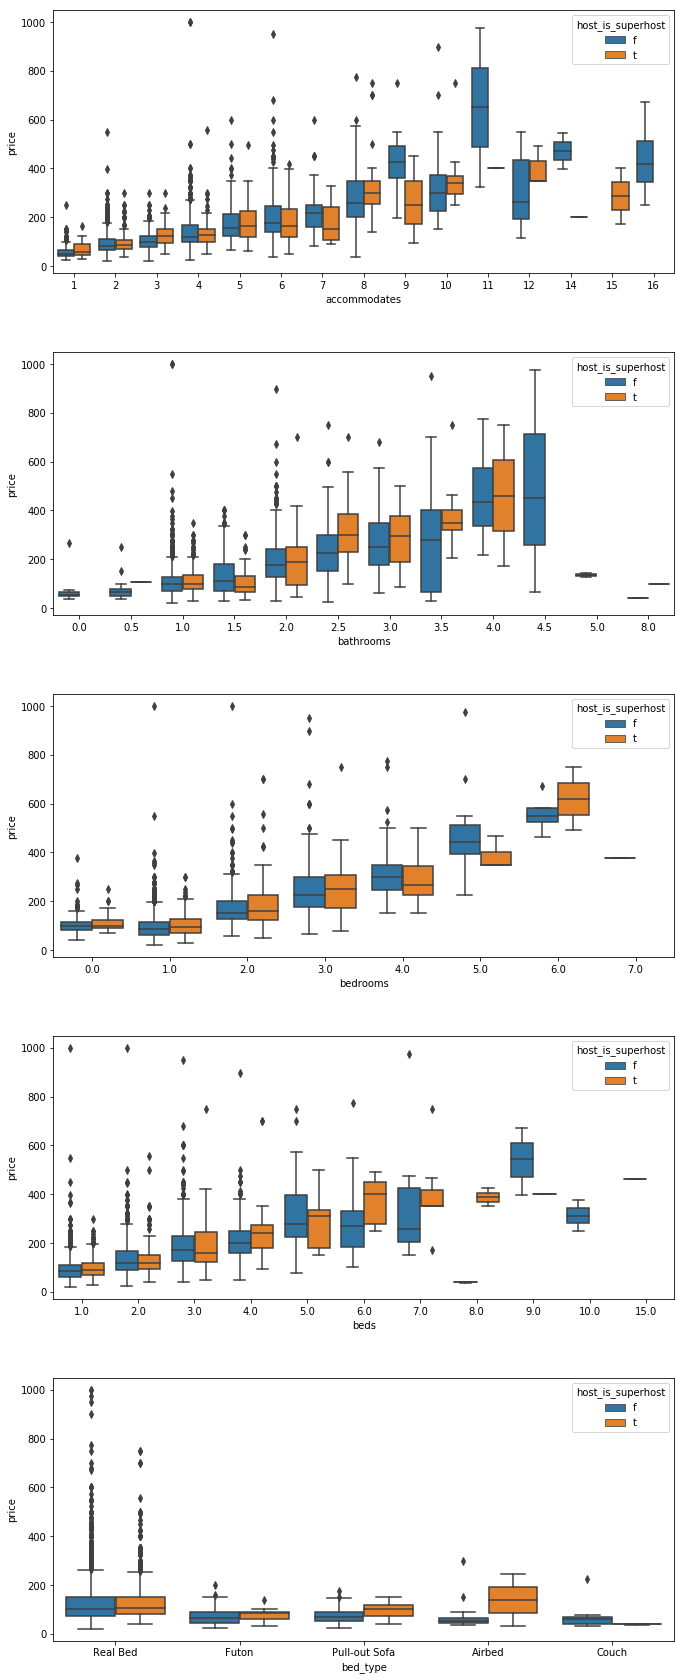

In [136]:
#boxplot for the ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type'] and the price.
house_size_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type']
fig, axs = plt.subplots(nrows=len(house_size_columns),ncols=1,figsize = (15,30))
fig.subplots_adjust(left = 0.125, right = 0.7, hspace = 0.3, wspace=1)
for i in range(len(house_size_columns)):
    sns.boxplot(x =house_size_columns[i], hue = 'host_is_superhost',y = 'price',data = df_listing,ax = axs[i])
 

The positive correlation between accommodates and price is obvious when accommodates is less than 11. As the accommodates is higher than 12, we also observe a reduce in price, this is probably caused by reduce of the house quality.I also observed as the number of the bedroom, bathroom, and bed increase, the rent of the price also increases. The price of the real bed is significantly higher than other bed type.

Next, I will consider the relationship between the listing price and the property type. The features that represent the property type are 'property_type', 'room_type','cancellation_policy'. 

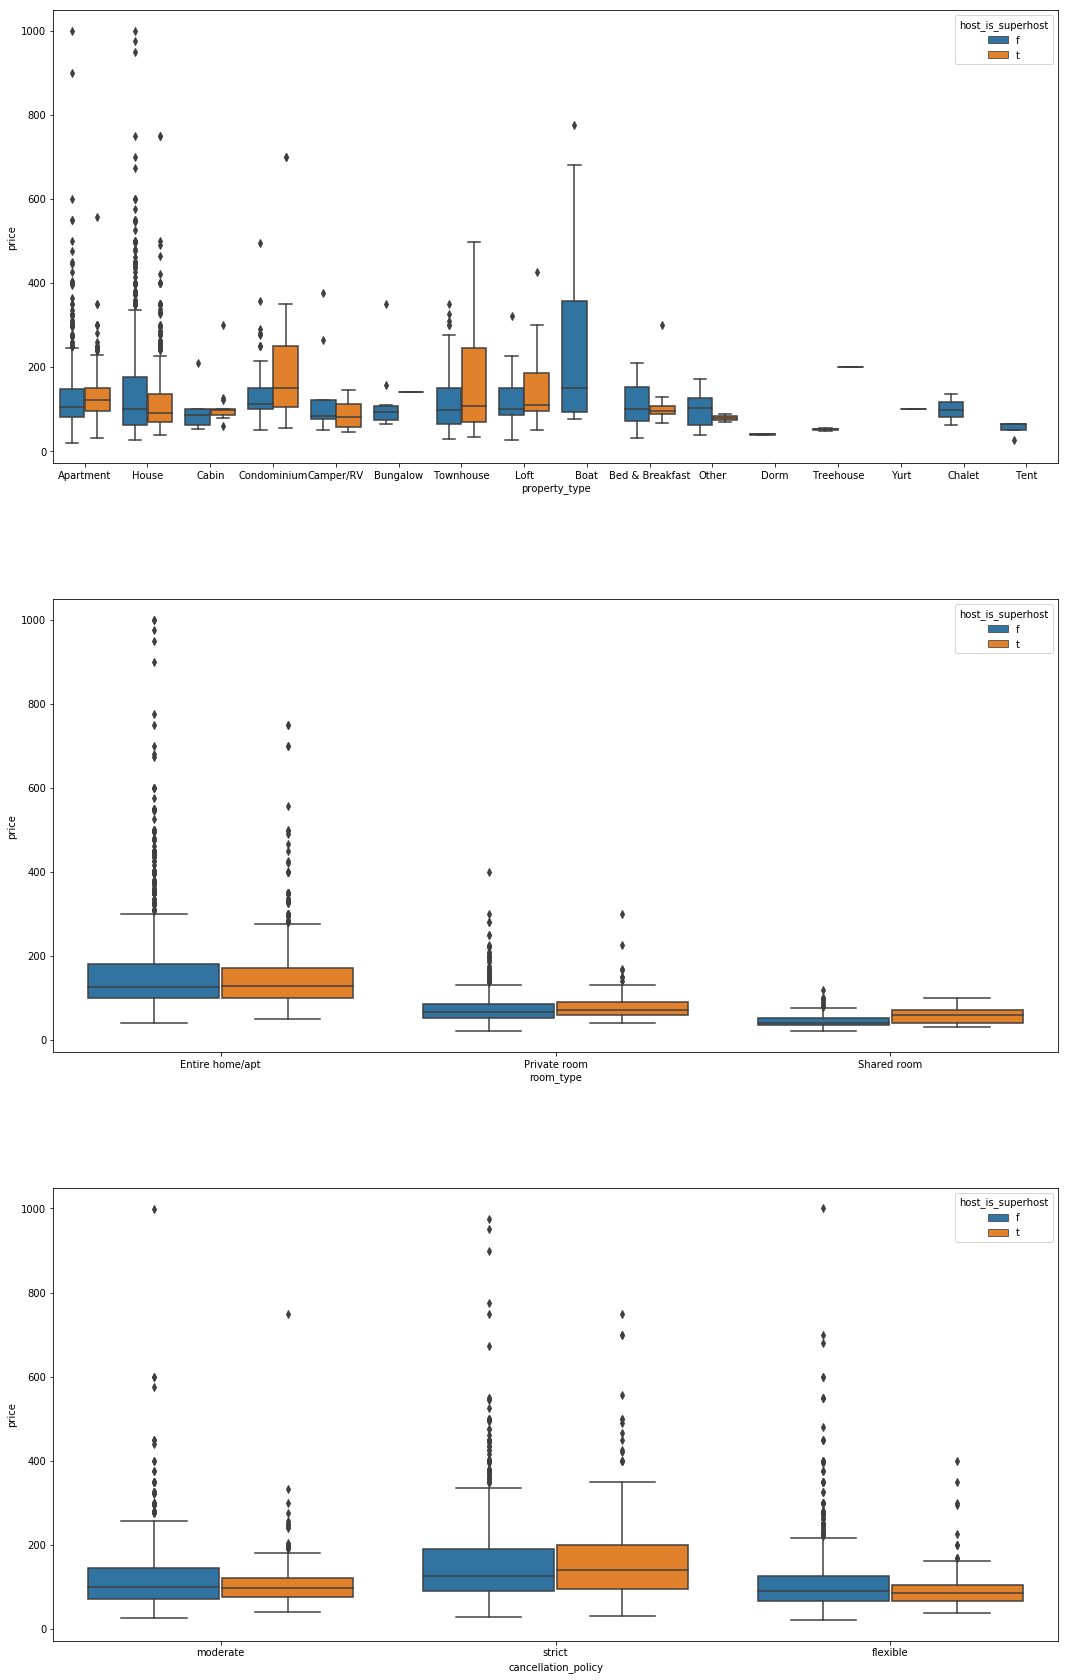

In [146]:
#boxplot for the ['property_type', 'room_type','cancellation_policy'.] and the price.
property_columns = ['property_type', 'room_type','cancellation_policy']
fig, axs = plt.subplots(nrows=len(property_columns),ncols=1,figsize = (18,30))
fig.subplots_adjust(left = 0.125, right = 0.9,hspace = 0.3, wspace=0.5)
for i in range(len(property_columns)):
    sns.boxplot(x =property_columns[i], hue = 'host_is_superhost',y = 'price',data = df_listing,ax = axs[i])

The boxplot shows that with different property-type, the average price can be different.Boat, condom, townhouse are more expensive than others. The entire house also is more expensive than the shared room and private room. The property that with strict cancellation policy also charges more than others. 

# Regression

## Select related features

Based on the previous analysis, I focus on four factors that can affect the rent price:1)whether the host is superhost;2)location, the variables including 'neighborhood','zipcode','neighbourhood_group_cleansed';3)Property type, including 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type','cancellation_policy'. 4)review, including 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',  'review_scores_location',  'review_scores_value'. 

In [148]:
#Selected related features.Since most the reviews has low correlation with price, I only choose 'review_scores_rating'
df_list_new = df_listing[[ 'price', 'host_is_superhost','neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type','accommodates',
      'cancellation_policy','number_of_reviews','review_scores_rating' ]]

In [149]:
#check the missing value 
df_list_new.isnull().mean()

price                           0.000000
host_is_superhost               0.000524
neighbourhood_group_cleansed    0.000000
property_type                   0.000262
room_type                       0.000000
bed_type                        0.000000
accommodates                    0.000000
cancellation_policy             0.000000
number_of_reviews               0.000000
review_scores_rating            0.169460
dtype: float64

In [150]:
#drop the row missing value 
df_list_new = df_list_new.dropna()

In [151]:
df_list_new = df_list_new.reset_index(drop=True)

In [152]:
df_list_new.head()

,price,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,bed_type,accommodates,cancellation_policy,number_of_reviews,review_scores_rating
0,85.0,f,Queen Anne,Apartment,Entire home/apt,Real Bed,4,moderate,207,95.0
1,150.0,t,Queen Anne,Apartment,Entire home/apt,Real Bed,4,strict,43,96.0
2,975.0,f,Queen Anne,House,Entire home/apt,Real Bed,11,strict,20,97.0
3,450.0,f,Queen Anne,House,Entire home/apt,Real Bed,6,strict,38,92.0
4,120.0,f,Queen Anne,House,Private room,Real Bed,2,strict,17,95.0


### Encode the Categorical variables

In [153]:
df_list_new.dtypes

price                           float64
host_is_superhost                object
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
bed_type                         object
accommodates                      int64
cancellation_policy              object
number_of_reviews                 int64
review_scores_rating            float64
dtype: object

In [154]:
#define the numerical can categorical columns
df_list_nums = df_list_new.select_dtypes(include = ['float','int64']) 
df_list_cat = df_list_new.select_dtypes(include = ['object']) 

In [155]:
df_list_nums.columns

Index(['price', 'accommodates', 'number_of_reviews', 'review_scores_rating'], dtype='object')

In [156]:
df_list_cat.columns

Index(['host_is_superhost', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'bed_type', 'cancellation_policy'],
      dtype='object')

In [157]:
cat = df_list_cat.columns

In [158]:
#encodeing the categorical variables with the get_dummies function.
df_list_cat_new = pd.get_dummies(df_list_cat, prefix = cat, drop_first = True, dummy_na = False)

In [159]:
#combine the eoncoded categorical variables with the numerical variables. 
df_list = pd.concat([df_list_nums,df_list_cat_new],axis = 1)

In [160]:
df_list.head()

,price,accommodates,number_of_reviews,review_scores_rating,host_is_superhost_t,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,4,207,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,150.0,4,43,96.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,975.0,11,20,97.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,450.0,6,38,92.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120.0,2,17,95.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [161]:
df_list.dtypes

price                                               float64
accommodates                                          int64
number_of_reviews                                     int64
review_scores_rating                                float64
host_is_superhost_t                                   uint8
neighbourhood_group_cleansed_Beacon Hill              uint8
neighbourhood_group_cleansed_Capitol Hill             uint8
neighbourhood_group_cleansed_Cascade                  uint8
neighbourhood_group_cleansed_Central Area             uint8
neighbourhood_group_cleansed_Delridge                 uint8
neighbourhood_group_cleansed_Downtown                 uint8
neighbourhood_group_cleansed_Interbay                 uint8
neighbourhood_group_cleansed_Lake City                uint8
neighbourhood_group_cleansed_Magnolia                 uint8
neighbourhood_group_cleansed_Northgate                uint8
neighbourhood_group_cleansed_Other neighborhoods      uint8
neighbourhood_group_cleansed_Queen Anne 

### Rescale the data

In [163]:
#Rescale the review_scores_rating, since it is in the range (0,100)
df_list['review_scores_rating'] = (df_list['review_scores_rating'] -df_list['review_scores_rating'].mean())/(df_list['review_scores_rating'].max() - df_list['review_scores_rating'].min() )

## regression model

In [164]:
#define the X and y
X = df_list.drop(['price'],axis = 1)
y = df_list['price']

In [165]:
#Use train_test_split to split the data set into train and test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
#linearregression
 
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [175]:
def evaluate(model, X,y):
    """
    This function print out the model performance, including the average errow, accuracy, R-square.
    """
    predictions = model.predict(X)
    errors = abs(predictions - y) 
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    r2 = r2_score(y,predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('R-square = {:0.2f}%.'.format(r2))
    return accuracy, r2

In [177]:
ln.fit(X_train,y_train)
(ln_accuracy,ln_r2) = evaluate(ln,X_test,y_test)
 

Model Performance
Average Error: 38.4245 degrees.
Accuracy = 67.21%.
R-square = 0.52%.


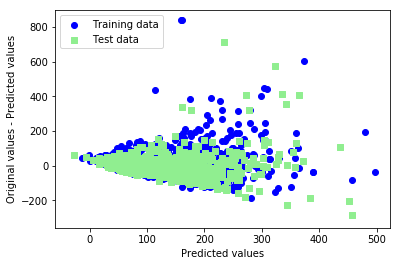

In [168]:
y_train_pred = ln.predict(X_train)
y_test_pred = ln.predict(X_test)
plt.scatter(y_train_pred, y_train-y_train_pred,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test-y_test_pred,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Original values - Predicted values')
plt.legend(loc='upper left')
plt.show()

The obove graph shows that the price increases, the predict values become more diversing, which shows that the prediction model has less power when price is higher. I think this is coincidence with the fact that the price is mainly in the range(0,200). The less data point in the price range (200,1000), the less prediction accuracy of the prediction model.

In [181]:
#I will use randomizesearch cross validation to find best random forest model for this problem

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None],
 'max_features': ['auto', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [182]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished
C:\Users\YiChen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', None], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [183]:
rf_random.best_params_

{'n_estimators': 31,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 38,
 'bootstrap': True}

In [184]:


base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
(base_accuracy,base_r2) = evaluate(base_model,X_test,y_test)

 
 
best_random = rf_random.best_estimator_
(random_accuracy,random_r2) = evaluate(best_random,X_test,y_test)
y_test_pred = best_random.predict(X_test)
 
 
print('Improvement of accuracy: {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Improvement of R-square {:0.2f}%.'.format( 100 * (random_r2 - base_r2) / base_r2))
 

Model Performance
Average Error: 39.0987 degrees.
Accuracy = 68.13%.
R-square = 0.48%.
Model Performance
Average Error: 37.3305 degrees.
Accuracy = 69.15%.
R-square = 0.52%.
Improvement of accuracy: 1.48%.
Improvement of R-square 9.04%.


The randomsearch crossvalidation shows better result than the base model.  

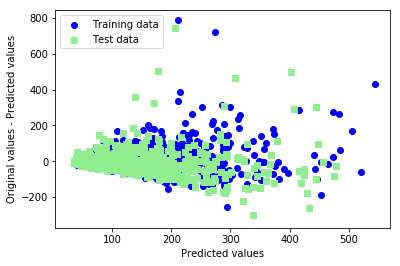

In [186]:
y_train_pred = best_random.predict(X_train)
y_test_pred = best_random.predict(X_test)
plt.scatter(y_train_pred, y_train-y_train_pred,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test-y_test_pred,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Original values - Predicted values')
plt.legend(loc='upper left')
plt.show()

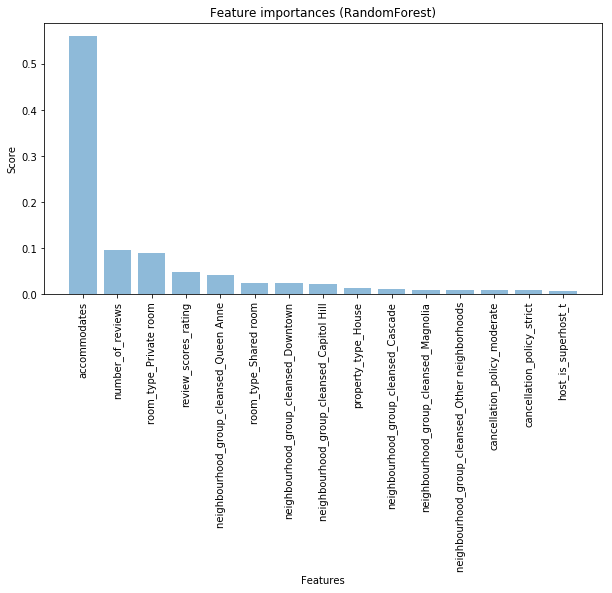

In [188]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, best_random.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = rf_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = rf_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (RandomForest)')

 
 
plt.show()

As we have analyzed before, the most important features to decide the lisint price is the 'accommodates', and the review, property type, location also affect on the listing price. 